impoting libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

Reading file

In [ ]:
#dataset contains index column
df = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)

understanding data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [ ]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [ ]:
# Null values in each column
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
# the percentage of null values for each column
df.isna().sum()/df.shape[0]

Gender                 0.000000
EthnicGroup            0.060050
ParentEduc             0.060213
LunchType              0.000000
TestPrep               0.059724
ParentMaritalStatus    0.038837
PracticeSport          0.020593
IsFirstChild           0.029503
NrSiblings             0.051304
TransportMeans         0.102281
WklyStudyHours         0.031167
MathScore              0.000000
ReadingScore           0.000000
WritingScore           0.000000
dtype: float64

In [ ]:
#check dublicates if it exists
df.duplicated().sum()

0

2) cleaning Data from missing data

In [ ]:
#used median to fill nulls in siblings
df['NrSiblings'].fillna(df['NrSiblings'].median(),inplace = True)
df.isna().sum()/df.shape[0]

Gender                 0.000000
EthnicGroup            0.060050
ParentEduc             0.060213
LunchType              0.000000
TestPrep               0.059724
ParentMaritalStatus    0.038837
PracticeSport          0.020593
IsFirstChild           0.029503
NrSiblings             0.000000
TransportMeans         0.102281
WklyStudyHours         0.031167
MathScore              0.000000
ReadingScore           0.000000
WritingScore           0.000000
dtype: float64

In [ ]:
#removing rows with more than 1 null
df = df[df.isnull().sum(axis=1) < 2]
df.isna().sum()/df.shape[0]

Gender                 0.000000
EthnicGroup            0.043975
ParentEduc             0.044632
LunchType              0.000000
TestPrep               0.044044
ParentMaritalStatus    0.028267
PracticeSport          0.014151
IsFirstChild           0.021416
NrSiblings             0.000000
TransportMeans         0.079300
WklyStudyHours         0.023043
MathScore              0.000000
ReadingScore           0.000000
WritingScore           0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28903 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               28903 non-null  object 
 1   EthnicGroup          27632 non-null  object 
 2   ParentEduc           27613 non-null  object 
 3   LunchType            28903 non-null  object 
 4   TestPrep             27630 non-null  object 
 5   ParentMaritalStatus  28086 non-null  object 
 6   PracticeSport        28494 non-null  object 
 7   IsFirstChild         28284 non-null  object 
 8   NrSiblings           28903 non-null  float64
 9   TransportMeans       26611 non-null  object 
 10  WklyStudyHours       28237 non-null  object 
 11  MathScore            28903 non-null  int64  
 12  ReadingScore         28903 non-null  int64  
 13  WritingScore         28903 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [ ]:
# fill the rest of null values to previous and next values
df = df.ffill().bfill()
df.isnull().sum()
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

3) checking Data

In [ ]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['EthnicGroup'].unique()

array(['group B', 'group A', 'group C', 'group D', 'group E'],
      dtype=object)

In [ ]:
df['ParentEduc'].unique()

array(["bachelor's degree", "master's degree", "associate's degree",
       'some college', 'high school', 'some high school'], dtype=object)

In [ ]:
df['LunchType'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
df['ParentMaritalStatus'].unique()

array(['married', 'single', 'widowed', 'divorced'], dtype=object)

In [ ]:
df['PracticeSport'].unique()

array(['regularly', 'sometimes', 'never'], dtype=object)

In [ ]:
df['IsFirstChild'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['NrSiblings'].unique()

array([3., 4., 1., 0., 2., 5., 7., 6.])

In [ ]:
df['TransportMeans'].unique()

array(['school_bus', 'private'], dtype=object)

In [ ]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [ ]:
df['MathScore'].unique()

array([ 71,  87,  45,  76,  73,  85,  41,  65,  37,  58,  40,  66,  80,
        48,  69,  88,  18,  46,  50,  74,  75,  70,  63,  56,  97,  81,
        51,  77,  53,  59,  60,  67,  54,  33,  84,  52,  61,   0,  39,
        62,  64,  42,  47,  44,  28,  49,  57,  27,  68,  79, 100,  72,
        98,  55,  90,  82,  86,  89,  21,  96,  91,  99,  83,  35,  43,
        93,  78,  94,  36,  29,  23,  92,  26,  38,  95,  30,  32,   8,
        34,  31,  25,  22,  17,  20,  16,  19,  24,  15,  11,  12,  13,
         9,  10,   7,  14])

In [ ]:
df['ReadingScore'].unique()

array([ 71,  93,  56,  78,  84,  43,  64,  59,  54,  52,  82,  73,  53,
        75,  89,  32,  42,  69,  76,  70,  72,  65,  87,  81,  91,  60,
        74,  55,  68,  45,  86,  41,  17,  39,  61,  58,  62,  37,  51,
        48,  25,  50,  47,  38,  80,  34,  77,  46,  66,  67,  92,  44,
        88, 100,  63,  90,  99,  83,  94,  57,  79,  49,  36,  85,  40,
        28,  97,  23,  33,  98,  95,  31,  24,  29,  96,  26,  21,  30,
        35,  18,  15,  11,  20,  19,  16,  22,  27,  12,  10,  14])

In [ ]:
df['WritingScore'].unique()

array([ 74,  91,  42,  75,  79,  89,  39,  68,  50,  52,  43,  71,  58,
        78,  86,  28,  47,  63,  70,  80,  76,  53,  65,  72,  61,  66,
        38,  82,  85,  60,  90,  69,  67,  55,  77,  48,  87,  49,  10,
        34,  59,  37,  57,  64,  54,  40,  21,  73,  45,  33,  83,  36,
        94,  62, 100,  99,  51,  95,  56,  41,  88,  27,  81,  98,  46,
        44,  19,  26,  31,  84,  97,  93,  96,  92,  15,  30,  32,  23,
        29,  35,  17,  25,  24,  20,   6,  22,  14,  18,  16,  12,   9,
        13,   4])

**4) Data Analysis**

In [ ]:
# How many males and females in this data?
df["Gender"].value_counts()

female    14547
male      14356
Name: Gender, dtype: int64

In [ ]:
# which Gender have more overall exam score?
df['total score'] = df['WritingScore'] + df['ReadingScore'] + df['MathScore']
fig = px.histogram(df, x="Gender", y="total score", histfunc='sum')
fig

In [ ]:
#top 10 students for each class
df_top = df.sort_values(by="total score", ascending=False).groupby("EthnicGroup").head(10)
df_top

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,total score
181,female,group C,master's degree,standard,none,married,regularly,yes,2.0,school_bus,5 - 10,100,100,100,300
287,male,group E,bachelor's degree,standard,completed,married,regularly,yes,1.0,school_bus,> 10,100,100,100,300
412,female,group E,associate's degree,standard,completed,married,regularly,yes,4.0,private,5 - 10,100,100,100,300
475,male,group E,associate's degree,standard,none,single,sometimes,yes,3.0,school_bus,> 10,100,100,100,300
376,female,group E,high school,standard,completed,divorced,sometimes,no,2.0,school_bus,5 - 10,100,100,100,300
203,female,group D,some college,standard,completed,married,sometimes,yes,1.0,school_bus,> 10,100,100,100,300
625,female,group C,associate's degree,standard,completed,married,sometimes,yes,0.0,school_bus,5 - 10,100,100,100,300
886,male,group E,associate's degree,standard,completed,married,sometimes,no,3.0,private,> 10,100,100,100,300
310,female,group E,master's degree,standard,none,married,sometimes,no,2.0,school_bus,5 - 10,100,100,100,300
962,female,group E,associate's degree,standard,none,single,regularly,no,3.0,school_bus,5 - 10,100,100,100,300


In [ ]:
#from top students which ones are studing less than 5 hours?
df_top[df_top['WklyStudyHours'].str.contains("< 5")]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,total score
831,male,group C,master's degree,standard,none,married,regularly,yes,1.0,private,< 5,100,100,100,300
143,female,group B,master's degree,standard,completed,married,regularly,yes,4.0,school_bus,< 5,99,99,100,298


In [ ]:
#calculate no of students for each no of studing hours
StdyH =pd.DataFrame(df.groupby('WklyStudyHours')['WklyStudyHours'].count().sort_values(ascending=False))
px.bar(StdyH,x=StdyH.index , y='WklyStudyHours',title="Number of students by studing hours")

In [ ]:
# count no of students for for each sibling class?
no_sbls =pd.DataFrame(df.groupby('NrSiblings')['NrSiblings'].count().sort_values(ascending=False))
px.scatter(no_sbls,x=no_sbls.index , y='NrSiblings',title="Number of sblings for studing students")

In [ ]:
# What is the average Grades of the ones practicing sports and not.
df.groupby('PracticeSport').mean()['total score']

<ipython-input-170-05701cef922e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



PracticeSport
never        199.319948
regularly    207.358999
sometimes    203.619158
Name: total score, dtype: float64

<Axes: xlabel='PracticeSport', ylabel='total score'>

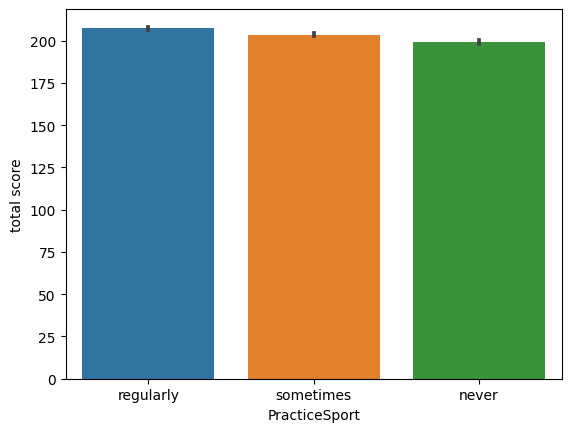

In [ ]:
#ploting the output
import seaborn as sns
sns.barplot(x='PracticeSport', y='total score', data=df, estimator=np.mean)


In [ ]:
# count no of students for for each sibling class and divide the diff Wkly study hours?(histogram)
fig = px.histogram(df, x="NrSiblings", color = 'WklyStudyHours' , marginal="box")
fig

In [ ]:
# avg scores for each no. of siblings class?
df_mean = df.groupby('NrSiblings').mean()
df_mean

<ipython-input-174-df0f4d963b34>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,MathScore,ReadingScore,WritingScore,total score
NrSiblings,,,,
0.0,66.793056,69.594444,68.787847,205.175347
1.0,66.473059,69.274712,68.265797,204.013568
2.0,66.519367,69.417595,68.422152,204.359114
3.0,66.704451,69.471014,68.614907,204.790373
4.0,66.346513,69.275341,68.223940,203.845794
5.0,66.714171,69.447665,68.369565,204.531401
6.0,65.975779,68.761246,67.788927,202.525952
7.0,67.352727,69.905455,69.101818,206.360000


<Axes: xlabel='NrSiblings', ylabel='total score'>

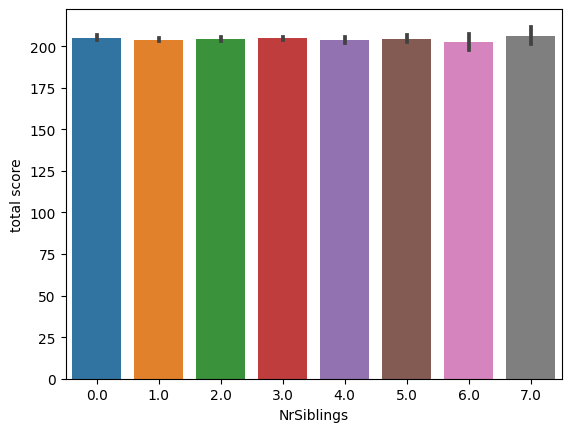

In [ ]:
#plot of avg of total score for each sibling class
sns.barplot(x='NrSiblings', y='total score', data=df, estimator=np.mean)

In [ ]:
#avg of each exam for each sibling class
import plotly.graph_objects as go
fig = go.Figure()
x=df['NrSiblings']
fig.add_trace(go.Histogram(x=df['NrSiblings'], y= df['ReadingScore'], histfunc ='avg', name="Avg reading score for each sib number" ))
fig.add_trace(go.Histogram(x=df['NrSiblings'], y= df['WritingScore'], histfunc ='avg',  name="Avg Writing score for each sib number" ))
fig.add_trace(go.Histogram(x=df['NrSiblings'], y= df['MathScore'], histfunc ='avg',  name="Avg Math score for each sib number" ))
fig

In [ ]:
# count marital statues of parents
fig = px.histogram(df, x="ParentMaritalStatus" )
fig

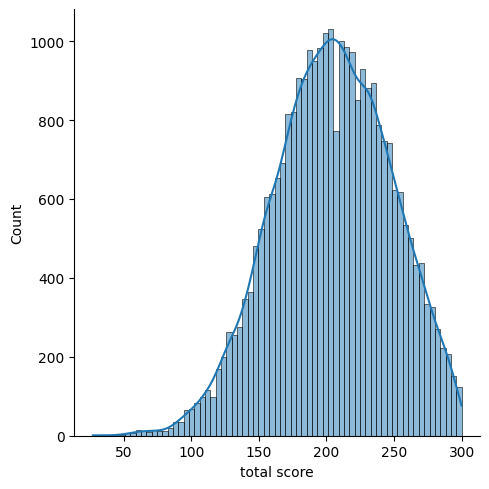

In [ ]:
#dist plot for total score
sns.displot(data=df, x="total score", kde=True)

In [ ]:
#dist plot for all scores
import plotly.figure_factory as ff

# Group data together
hist_data = [df['ReadingScore'].to_list(), df['WritingScore'].to_list(), df['MathScore'].to_list()]

group_labels = ['Group 1', 'Group 2', 'Group 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,  show_hist=False)
fig.show()

In [ ]:
# count first child
fig = px.histogram(df, x="IsFirstChild" )
fig

In [ ]:
#count of second child for widowed parents
males = df[(df["IsFirstChild"]=='no') & (df['ParentMaritalStatus']=='widowed')]
males.count()['Gender']

200

In [ ]:
# no of students completed the prep Exam
fig = px.pie(df, names='TestPrep' ,title='prep Exam')
fig.show()

5) encoding the categorical (extra)

In [ ]:
#Encoding Categorical feature
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler # Data preprocessing
from sklearn.impute import SimpleImputer # Data preprocessing
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Fit and transform the encoder on categorical columns
catego_cols = df.select_dtypes(include=['object']).columns
encoded_cols = encoder.fit_transform(df[catego_cols])

In [ ]:
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(catego_cols))

In [ ]:
# Drop the original categorical columns from the original DataFrame
df.drop(catego_cols, axis=1, inplace=True)

In [ ]:
# Concatenate the original DataFrame with the encoded DataFrame
df = df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df.head(2)

,NrSiblings,MathScore,ReadingScore,WritingScore,total score,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
0,3.0,71,71,74,216,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,4.0,87,93,91,271,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
df.dtypes

NrSiblings                      float64
MathScore                         int64
ReadingScore                      int64
WritingScore                      int64
total score                       int64
Gender_male                     float64
EthnicGroup_group B             float64
EthnicGroup_group C             float64
EthnicGroup_group D             float64
EthnicGroup_group E             float64
ParentEduc_bachelor's degree    float64
ParentEduc_high school          float64
ParentEduc_master's degree      float64
ParentEduc_some college         float64
ParentEduc_some high school     float64
LunchType_standard              float64
TestPrep_none                   float64
ParentMaritalStatus_married     float64
ParentMaritalStatus_single      float64
ParentMaritalStatus_widowed     float64
PracticeSport_regularly         float64
PracticeSport_sometimes         float64
IsFirstChild_yes                float64
TransportMeans_school_bus       float64
WklyStudyHours_< 5              float64


<Axes: >

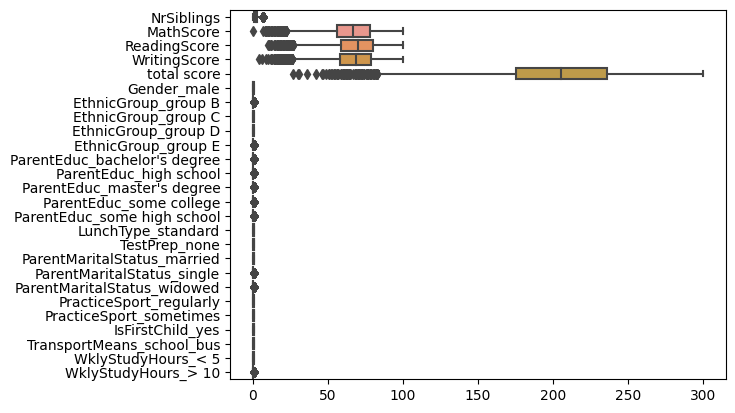

In [ ]:
sns.boxplot(data=df, orient="h")

<Axes: >

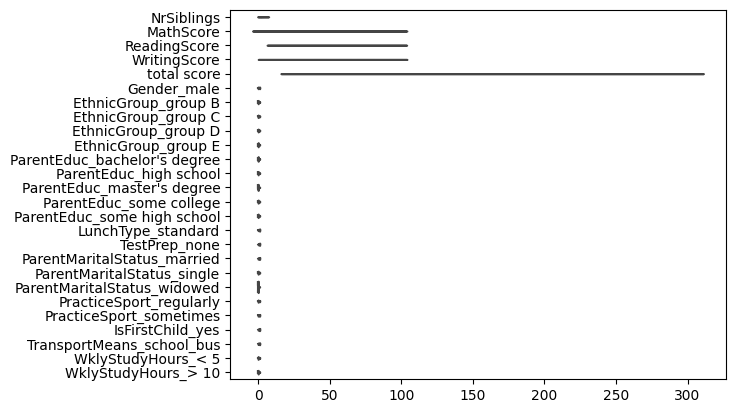

In [ ]:
sns.violinplot(data=df, orient="h", inner="quart")

In [ ]:
df.corr()

,NrSiblings,MathScore,ReadingScore,WritingScore,total score,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
NrSiblings,1.000000,-0.000086,-0.000448,-0.001459,-0.000703,-0.000214,-0.004746,0.003326,-0.007900,0.009437,...,0.004684,-0.003728,-0.003976,0.002800,-0.013372,0.006177,-0.118139,-0.010262,-0.003075,0.003961
MathScore,-0.000086,1.000000,0.817932,0.807126,0.920095,0.162343,-0.097175,-0.081484,0.040827,0.217830,...,-0.136626,0.005199,-0.009824,0.008052,0.061197,-0.019187,0.015868,0.004396,-0.078981,0.066003
ReadingScore,-0.000448,0.817932,1.000000,0.952402,0.969315,-0.237288,-0.070315,-0.042573,0.038599,0.125642,...,-0.206644,-0.002684,-0.003535,0.004516,0.027888,-0.009272,0.012965,0.000670,-0.051360,0.032842
WritingScore,-0.001459,0.807126,0.952402,1.000000,0.966257,-0.289623,-0.081595,-0.062276,0.091397,0.104523,...,-0.284501,-0.004257,-0.003810,0.002994,0.056397,-0.022974,0.010761,0.000470,-0.053227,0.041730
total score,-0.000703,0.920095,0.969315,0.966257,1.000000,-0.126433,-0.087418,-0.065538,0.060163,0.157148,...,-0.220080,-0.000589,-0.006040,0.005455,0.051262,-0.018138,0.013866,0.001953,-0.064417,0.049422
Gender_male,-0.000214,0.162343,-0.237288,-0.289623,-0.126433,1.000000,-0.001758,0.003197,0.001093,-0.001222,...,0.010641,0.021337,-0.011085,0.004383,-0.005721,0.005467,0.006326,0.006115,0.001934,0.006504
EthnicGroup_group B,-0.004746,-0.097175,-0.070315,-0.081595,-0.087418,-0.001758,1.000000,-0.345154,-0.299200,-0.203070,...,-0.008119,0.006351,0.001865,-0.007830,-0.003899,0.000298,0.008522,0.002795,0.001160,-0.001129
EthnicGroup_group C,0.003326,-0.081484,-0.042573,-0.062276,-0.065538,0.003197,-0.345154,1.000000,-0.407741,-0.276738,...,-0.002369,0.003941,-0.003089,-0.001103,0.001432,0.003196,-0.001699,-0.016301,0.008199,-0.012943
EthnicGroup_group D,-0.007900,0.040827,0.038599,0.091397,0.060163,0.001093,-0.299200,-0.407741,1.000000,-0.239893,...,0.003243,-0.005442,-0.001448,-0.003658,-0.003667,-0.000969,0.000876,0.011953,-0.003515,0.011618
EthnicGroup_group E,0.009437,0.217830,0.125642,0.104523,0.157148,-0.001222,-0.203070,-0.276738,-0.239893,1.000000,...,-0.000235,-0.002243,0.004039,0.010360,0.009806,-0.010015,-0.003251,0.008350,-0.005076,-0.000730
